## Hierarchial methods

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

import sklearn
import sklearn.metrics as sm

In [2]:
from sklearn.cluster import AgglomerativeClustering
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist

In [3]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10, 3))
%matplotlib inline
sns.set_style("whitegrid")

<Figure size 1000x300 with 0 Axes>

In [4]:
address = '/content/mtcars.csv'

cars = pd.read_csv( address )
cars.columns = ['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']

x = cars[['mpg','disp','hp','wt']].values
y = cars.iloc[:,9].values

### Using scipy to generate dendrograms

In [5]:
z = linkage(x, 'ward')

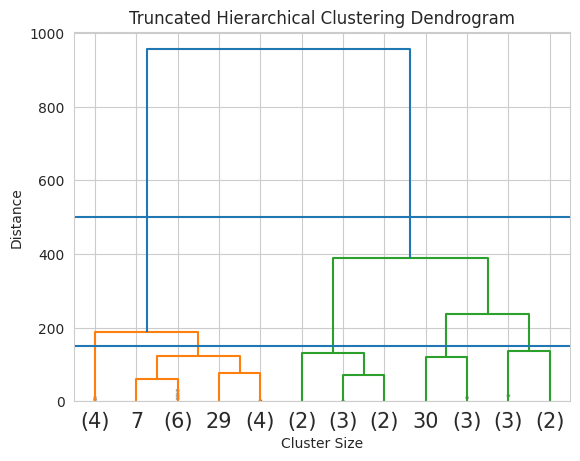

In [6]:
dendrogram( z, truncate_mode='lastp', p=12, leaf_rotation=.45, leaf_font_size=15, show_contracted=True )
plt.title( 'Truncated Hierarchical Clustering Dendrogram' )
plt.xlabel( 'Cluster Size' )
plt.ylabel( 'Distance' )

plt.axhline( y=500 )
plt.axhline( y=150 )
plt.show()
# From graph we use cluster size as 2 as theres 2 points, max y value we can use is 400

### Generating hierarchical clusters

In [7]:
# Parameter setting for this type of clustering is trial and error (find the best combination)
k = 2

Hclustering = AgglomerativeClustering( n_clusters=2, metric='euclidean', linkage='ward' )
Hclustering.fit( x )

sm.accuracy_score( y, Hclustering.labels_ )

0.78125

In [8]:
Hclustering = AgglomerativeClustering( n_clusters=2, metric='euclidean', linkage='average' )
Hclustering.fit( x )

sm.accuracy_score( y, Hclustering.labels_ )

0.78125

In [9]:
Hclustering = AgglomerativeClustering( n_clusters=2, metric='euclidean', linkage='complete' )
Hclustering.fit( x )

sm.accuracy_score( y, Hclustering.labels_ )

0.4375

In [16]:
Hclustering = AgglomerativeClustering( n_clusters=2, metric='manhattan', linkage='average' )
Hclustering.fit( x )

sm.accuracy_score( y, Hclustering.labels_ )

0.71875

In [19]:
Hclustering = AgglomerativeClustering( n_clusters=2, metric='cosine', linkage='complete' )
Hclustering.fit( x )

sm.accuracy_score( y, Hclustering.labels_ )

0.28125